In [114]:
import json
import numpy as np
import pandas as pd
 

In [78]:
fname = 'ASIST_data_study_id_000001_condition_id_000005_trial_id_000009_messages.json'

In [80]:
with open('Data/messages/Falcon/'+fname) as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")


In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [81]:
temp_df = pd.json_normalize(data)

In [82]:
temp_df.columns = temp_df.columns.map(lambda x: x.replace(".", "_"))

In [83]:
temp_df[:10]

,host,topic,message,@timestamp,@version,header_version,header_message_type,header_timestamp,msg_date,msg_subjects,msg_trial_id,msg_experimenter,msg_testbed_version,msg_experiment_id,msg_name,data_id,data_x,data_y,data_z,data_life,data_name,data_motion_z,data_world_time,data_motion_y,data_timestamp,data_yaw,data_motion_x,data_total_time,data_observation_number,data_pitch,data_entity_type,msg_timestamp,msg_source,msg_version,msg_sub_type,data_playername,data_equippeditemname,data_item_y,data_item_x,data_item_z,data_sprinting,data_entered_area_id,data_entered_area_name,data_itemname,data_mission,data_mission_state,data_exited_area_name,data_exited_area_id,data_door_z,data_door_y,data_open,data_door_x,data_color,data_triage_state,data_victim_y,data_victim_z,data_victim_x,data_scoreboard_ASU_MC,data_beep_y,data_beep_x,data_beep_z,data_source_entity,data_message,data_lever_x,data_lever_y,data_powered,data_lever_z
0,3fee64221845,trial/start,"{\n ""header"": {\n ""timestamp"": ""2020-06-18...",2020-06-18T16:25:18.157Z,1,0.5,trial,2020-06-18T16:25:18.1531Z,2020-06-18T16:25:18.1531Z,[Subject_000013],c5ee9c3c-d70d-453c-be53-b76f4815dda4,Lixaio,0.5,d257b807-861a-4590-b520-3a043ca64fc0,Trial-2020-06-18-1-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3fee64221845,observations/state,"{""header"":{""timestamp"":""2020-06-18T16:26:33.02...",2020-06-18T16:26:33.028Z,1,0.5,observation,2020-06-18T16:26:33.022Z,NaN,NaN,c5ee9c3c-d70d-453c-be53-b76f4815dda4,NaN,NaN,d257b807-861a-4590-b520-3a043ca64fc0,NaN,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2151.5,60.0,147.5,20.0,ASU_MC,0.0,10000.0,0.0,2020-06-18T16:26:33.022Z,0.0,0.0,3440890.0,1.0,0.0,human,2020-06-18T16:26:33.022Z,simulator,0.5,state,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3fee64221845,observations/events/player/itemequipped,"{""header"":{""timestamp"":""2020-06-18T16:26:33.02...",2020-06-18T16:26:33.038Z,1,0.5,event,2020-06-18T16:26:33.029Z,NaN,NaN,c5ee9c3c-d70d-453c-be53-b76f4815dda4,NaN,NaN,d257b807-861a-4590-b520-3a043ca64fc0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-18T16:26:33.030Z,simulator,0.5,Event:ItemEquipped,ASU_MC,minecraft:air,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3fee64221845,observations/state,"{""header"":{""timestamp"":""2020-06-18T16:26:33.13...",2020-06-18T16:26:33.137Z,1,0.5,observation,2020-06-18T16:26:33.134Z,NaN,NaN,c5ee9c3c-d70d-453c-be53-b76f4815dda4,NaN,NaN,d257b807-861a-4590-b520-3a043ca64fc0,NaN,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2151.5,60.0,147.5,20.0,ASU_MC,0.0,10000.0,0.0,2020-06-18T16:26:33.134Z,0.0,0.0,3440892.0,2.0,0.0,human,2020-06-18T16:26:33.134Z,simulator,0.5,state,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3fee64221845,observations/state,"{""header"":{""timestamp"":""2020-06-18T16:26:33.23...",2020-06-18T16:26:33.242Z,1,0.5,observation,2020-06-18T16:26:33.238Z,NaN,NaN,c5ee9c3c-d70d-453c-be53-b76f4815dda4,NaN,NaN,d257b807-861a-4590-b520-3a043ca64fc0,NaN,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2151.5,60.0,147.5,20.0,ASU_MC,0.0,10000.0,0.0,2020-06-18T16:26:33.238Z,0.0,0.0,3440894.0,3.0,0.0,human,2020-06-18T16:26:33.238Z,simulator,0.5,state,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3fee64221845,observations/state,"{""header"":{""timestamp"":""2020-06-18T16:26:33.34...",2020-06-18T16:26:33.346Z,1,0.5,observation,2020-06-18T16:26:33.342Z,NaN,NaN,c5ee9c3c-d70d-453c-be53-b76f4815dda4,NaN,NaN,d257b807-861a-4590-b520-3a043ca64fc0,NaN,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2151.5,60.0,147.5,20.0,ASU_MC,0.0,10000.0,0.0,2020-06-18

In [84]:
temp_df['msg_subjects'] = temp_df['msg_subjects'].apply(lambda x: x[0] if x==x else x)

In [85]:
sub_arr = list(temp_df['msg_subjects'].unique())

In [86]:
sub_id = [val for val in sub_arr if str(val) != 'nan'][0]

In [87]:
sub_id

'Subject_000013'

In [90]:
subject_id = 'subject_id_'+sub_id[8:]

In [91]:
subject_id

'subject_id_000013'

In [92]:
filter_col = [col for col in temp_df if col.startswith('data')]
df = temp_df[filter_col]

In [93]:
df[:10]

,data_id,data_x,data_y,data_z,data_life,data_name,data_motion_z,data_world_time,data_motion_y,data_timestamp,data_yaw,data_motion_x,data_total_time,data_observation_number,data_pitch,data_entity_type,data_playername,data_equippeditemname,data_item_y,data_item_x,data_item_z,data_sprinting,data_entered_area_id,data_entered_area_name,data_itemname,data_mission,data_mission_state,data_exited_area_name,data_exited_area_id,data_door_z,data_door_y,data_open,data_door_x,data_color,data_triage_state,data_victim_y,data_victim_z,data_victim_x,data_scoreboard_ASU_MC,data_beep_y,data_beep_x,data_beep_z,data_source_entity,data_message,data_lever_x,data_lever_y,data_powered,data_lever_z
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2151.5,60.0,147.5,20.0,ASU_MC,0.0,10000.0,0.0,2020-06-18T16:26:33.022Z,0.0,0.0,3440890.0,1.0,0.0,human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,minecraft:air,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2151.5,60.0,147.5,20.0,ASU_MC,0.0,10000.0,0.0,2020-06-18T16:26:33.134Z,0.0,0.0,3440892.0,2.0,0.0,human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2151.5,60.0,147.5,20.0,ASU_MC,0.0,10000.0,0.0,2020-06-18T16:26:33.238Z,0.0,0.0,3440894.0,3.0,0.0,human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2151.5,60.0,147.5,20.0,ASU_MC,0.0,10000.0,0.0,2020-06-18T16:26:33.342Z,0.0,0.0,3440896.0,4.0,0.0,human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2151.5,60.0,147.5,20.0,ASU_MC,0.0,10000.0,0.0,2020-06-18T16:26:33.445Z,0.0,0.0,3440899.0,5.0,0.0,human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2151.5,60.0,147.5,20.0,ASU_MC,0.0,10000.0,0.0,2020-06-18T16:26:33.548Z,0.0,0.0,3440901.0,6.0,0.0,human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2151.5,60.0,147.5,20.0,ASU_MC,0.0,10000.0,0.0,2020-06-18T16:26:33.651Z,0.0,0.0,3440903.0,7.0,0.0,human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2151.5,60.0,147.5,20.0,ASU_MC,0.0,10000.0,0.0,2020-06-18T16:26:33.754Z,0.0,0.0,3440905.0,8.0,0.0,human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df['data_timestamp'] = pd.to_datetime(df['data_timestamp'], format="%Y-%m-%dT%H:%M:%S")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
start_index = df[df['data_mission_state'].str.lower()=='start'].index.values[0]

In [96]:
start_index

963

In [97]:
start_time = df.at[start_index-1,'data_timestamp']

In [98]:
start_time

Timestamp('2020-06-18 16:32:27.852000+0000', tz='UTC')

In [99]:
df['time_elapsed'] = (df['data_timestamp']-start_time)/np.timedelta64(1,'m')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
cols = ['data_x', 'data_y', 'data_z', 'data_timestamp', 'time_elapsed']
df.loc[:,cols] = df.loc[:,cols].ffill()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [106]:
df

,data_id,data_x,data_y,data_z,data_life,data_name,data_motion_z,data_world_time,data_motion_y,data_timestamp,data_yaw,data_motion_x,data_total_time,data_observation_number,data_pitch,data_entity_type,data_playername,data_equippeditemname,data_item_y,data_item_x,data_item_z,data_sprinting,data_entered_area_id,data_entered_area_name,data_itemname,data_mission,data_mission_state,data_exited_area_name,data_exited_area_id,data_door_z,data_door_y,data_open,data_door_x,data_color,data_triage_state,data_victim_y,data_victim_z,data_victim_x,data_scoreboard_ASU_MC,data_beep_y,data_beep_x,data_beep_z,data_source_entity,data_message,data_lever_x,data_lever_y,data_powered,data_lever_z,time_elapsed
1000,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2092.130958,60.0,147.633000,20.0,ASU_MC,-0.176234,10000.0,0.0,2020-06-18 16:32:31.299000+00:00,236.46506,0.392548,3448056.0,980.0,14.701929,human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057450
1001,NaN,-2092.130958,60.0,147.633000,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:31.299000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057450
1002,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2092.013933,60.0,147.580462,20.0,ASU_MC,-0.052538,10000.0,0.0,2020-06-18 16:32:31.403000+00:00,237.80159,0.117025,3448058.0,981.0,14.701929,human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059183
1003,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2092.097591,60.0,147.346086,20.0,ASU_MC,-0.234376,10000.0,0.0,2020-06-18 16:32:31.505000+00:00,241.60559,-0.083658,3448060.0,982.0,14.290686,human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060883
1004,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2092.014089,60.0,147.043243,20.0,ASU_MC,-0.302843,10000.0,0.0,2020-06-18 16:32:31.607000+00:00,244.27867,0.083502,3448062.0,983.0,13.776631,human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062583
1005,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2091.712929,60.0,146.825388,20.0,ASU_MC,-0.217854,10000.0,0.0,2020-06-18 16:32:31.711000+00:00,245.71802,0.301160,3448064.0,984.0,13.468199,human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064317
1006,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2091.343917,60.0,146.642858,20.0,ASU_MC,-0.182530,10000.0,0.0,2020-06-18 16:32:31.813000+00:00,248.28830,0.369012,3448066.0,985.0,13.468199,human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066017
1007,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2091.198292,60.0,146.504249,20.0,ASU_MC,-0.138609,10000.0,0.0,2020-06-18 16:32:31.915000+00:00,250.03607,0.145624,3448068.0,986.0,13.365388,human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067717
1008,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2090.815580,60.0,146.025548,20.0,ASU_MC,-0.478701,10000.0,0.0,2020-06-18 16:32:32.017000+00:00,250.96136,0.382712,3448070.0,987.0,13.365388,human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.069417
1009,8c4d85a6-60a2-39f1-926e-aa2a03662101,-2090.449763,60.0,145.838374,20.0,ASU_MC,-0.187173,10000.0,0.0,2020-06-18 16:32:32.120000+00:00,252.50352,0.365817,3448072.0,988.0,13.673820,human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071133


In [101]:
room_df = df[pd.notna(df['data_entered_area_id'])]

In [102]:
room_df

,data_id,data_x,data_y,data_z,data_life,data_name,data_motion_z,data_world_time,data_motion_y,data_timestamp,data_yaw,data_motion_x,data_total_time,data_observation_number,data_pitch,data_entity_type,data_playername,data_equippeditemname,data_item_y,data_item_x,data_item_z,data_sprinting,data_entered_area_id,data_entered_area_name,data_itemname,data_mission,data_mission_state,data_exited_area_name,data_exited_area_id,data_door_z,data_door_y,data_open,data_door_x,data_color,data_triage_state,data_victim_y,data_victim_z,data_victim_x,data_scoreboard_ASU_MC,data_beep_y,data_beep_x,data_beep_z,data_source_entity,data_message,data_lever_x,data_lever_y,data_powered,data_lever_z,time_elapsed
145,NaN,-2109.209395,67.021635,156.307589,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:26:47.210000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh2,Left Hallway (2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.677367
965,NaN,-2105.500000,60.000000,147.500000,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:27.954000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,ew,Entrance Walkway,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001700
995,NaN,-2094.539335,60.000000,147.772703,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:30.778000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,el,Entrance Lobby,NaN,NaN,NaN,ew,Entrance Walkway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048767
1188,NaN,-2089.300000,60.000000,151.026278,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:50.062000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh1,Left Hallway,NaN,NaN,NaN,el,Entrance Lobby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.370167
1197,NaN,-2088.898147,60.000000,153.651587,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:50.880000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,lh1,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.383800
1223,NaN,-2080.554556,60.000000,150.725837,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:53.237000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,br,Open Break Room,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.423083
1501,NaN,-2079.997941,60.000000,152.395729,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:33:20.747000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,br,Open Break Room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.881583
1639,NaN,-2074.300000,60.000000,150.782722,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:33:33.742000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,es1,Executive Suite 1,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.098167
1686,NaN,-2074.310006,60.000000,152.318618,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:33:38.237000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,es1,Executive Suite 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.173083
1697,NaN,-2075.335019,60.000000,156.143664,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:33:39.158000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,chb,Center Hallway Bottom,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.188433


In [103]:
triage_df = df[df['data_triage_state']=='SUCCESSFUL']

In [104]:
triage_df

,data_id,data_x,data_y,data_z,data_life,data_name,data_motion_z,data_world_time,data_motion_y,data_timestamp,data_yaw,data_motion_x,data_total_time,data_observation_number,data_pitch,data_entity_type,data_playername,data_equippeditemname,data_item_y,data_item_x,data_item_z,data_sprinting,data_entered_area_id,data_entered_area_name,data_itemname,data_mission,data_mission_state,data_exited_area_name,data_exited_area_id,data_door_z,data_door_y,data_open,data_door_x,data_color,data_triage_state,data_victim_y,data_victim_z,data_victim_x,data_scoreboard_ASU_MC,data_beep_y,data_beep_x,data_beep_z,data_source_entity,data_message,data_lever_x,data_lever_y,data_powered,data_lever_z,time_elapsed
1159,NaN,-2089.401273,60.0,144.790391,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:47.301000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellow,SUCCESSFUL,60.0,144.0,-2087.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.324150
1378,NaN,-2080.480675,60.0,149.554822,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:33:08.793000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellow,SUCCESSFUL,60.0,150.0,-2077.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.682350
1479,NaN,-2081.203145,60.0,146.949123,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:33:18.804000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Green,SUCCESSFUL,60.0,145.0,-2084.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849200
2024,NaN,-2045.654574,60.0,177.004356,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:34:10.740000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellow,SUCCESSFUL,60.0,176.0,-2044.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.714800
2227,NaN,-2048.008971,60.0,160.291315,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:34:30.349000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellow,SUCCESSFUL,60.0,158.0,-2049.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.041617
2628,NaN,-2061.644074,60.0,166.564281,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:35:07.751000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellow,SUCCESSFUL,60.0,166.0,-2064.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.664983
2995,NaN,-2030.734470,61.0,174.238629,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:35:42.572000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellow,SUCCESSFUL,60.0,176.0,-2029.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.245333
3351,NaN,-2066.271696,61.0,187.320163,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:36:16.832000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellow,SUCCESSFUL,60.0,186.0,-2065.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.816333
3768,NaN,-2068.062642,60.0,163.690521,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:36:55.774000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Green,SUCCESSFUL,60.0,163.0,-2072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.465367
3881,NaN,-2067.700000,60.0,167.644269,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:37:06.906000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Green,SUCCESSFUL,60.0,167.0,-2072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.650900


In [60]:
room_df['next_room'] = room_df['data_entered_area_id'].shift(-1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
event_df = room_df.append(triage_df).sort_index()

In [38]:
event_df

,data_pitch,data_life,data_x,data_id,data_motion_y,data_motion_x,data_observation_number,data_name,data_motion_z,data_timestamp,data_y,data_total_time,data_entity_type,data_yaw,data_world_time,data_z,data_playername,data_equippeditemname,data_item_y,data_item_x,data_item_z,data_sprinting,data_door_z,data_door_x,data_open,data_door_y,data_entered_area_name,data_exited_area_name,data_exited_area_id,data_entered_area_id,data_itemname,data_mission_state,data_mission,data_beep_x,data_beep_y,data_beep_z,data_source_entity,data_message,data_victim_z,data_triage_state,data_victim_x,data_color,data_victim_y,data_scoreboard_K_Fuse,data_powered,data_lever_x,data_lever_z,data_lever_y,time_elapsed,next_room
1666,NaN,NaN,-2094.776379,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-16 21:57:31.228,60.000000,NaN,NaN,NaN,NaN,145.024049,K_Fuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entrance Lobby,Entrance Walkway,ew,el,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.234583,lh1
1687,NaN,NaN,-2091.300000,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-16 21:57:33.076,60.000000,NaN,NaN,NaN,NaN,151.309109,K_Fuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left Hallway,Entrance Lobby,el,lh1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.265383,fy1
1782,NaN,NaN,-2114.714191,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-16 21:57:22.098,60.000000,NaN,NaN,NaN,NaN,149.119017,K_Fuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Front Yard,Entrance Walkway,ew,fy1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082417,ew
1795,NaN,NaN,-2114.856029,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-16 21:57:23.227,60.000000,NaN,NaN,NaN,NaN,148.461930,K_Fuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entrance Walkway,Front Yard,fy1,ew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101233,ms
1835,NaN,NaN,-2150.417071,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-16 21:57:17.048,60.000000,NaN,NaN,NaN,NaN,147.438865,K_Fuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mission Start,NaN,NaN,ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001750,ew
1838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,K_Fuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entrance Walkway,Mission Start,ms,ew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lh2
2108,NaN,NaN,-2088.676410,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-16 21:57:34.613,60.000000,NaN,NaN,NaN,NaN,153.082300,K_Fuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left Hallway,Left Hallway,lh1,lh2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.291000,so
2122,NaN,NaN,-2086.300000,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-16 21:57:35.740,60.000000,NaN,NaN,NaN,NaN,150.683521,K_Fuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secruity Office,Left Hallway,lh2,so,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.309783,es1
2175,NaN,NaN,-2074.448619,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-16 21:58:15.781,60.000000,NaN,NaN,NaN,NaN,150.932212,K_Fuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Executive Suite 1,Left Hallway,lh2,es1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977133,lh2
2212,NaN,NaN,-2086.314872,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-16 21:57:54.388,60.000000,NaN,NaN,NaN,NaN,152.362538,K_Fuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left Hallway,Secruity Office,so,lh2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.620583,br


In [219]:
event_df['next_room'] = event_df['next_room'].ffill()

In [220]:
event_df['next_victim_is_yellow'] = event_df['data_color'].bfill()

In [221]:
event_df['next_victim_is_yellow'] = event_df['next_victim_is_yellow']=='Yellow'

In [222]:
event_df['next_victim_x'] = event_df['data_victim_x'].bfill()
event_df['next_victim_y'] = event_df['data_victim_y'].bfill()
event_df['next_victim_z'] = event_df['data_victim_z'].bfill()

In [223]:
event_df['next_victim_triaged_distance'] = ((event_df['data_x']-event_df['next_victim_x'])**2+ (event_df['data_z']-event_df['next_victim_z'])**2+ (event_df['data_y']-event_df['next_victim_y'])**2)**(1/2)


In [224]:
new_df = event_df.reset_index(drop=True)

In [279]:
new_df

,data_id,data_x,data_y,data_z,data_life,data_name,data_motion_z,data_world_time,data_motion_y,data_timestamp,data_yaw,data_motion_x,data_total_time,data_observation_number,data_pitch,data_entity_type,data_playername,data_equippeditemname,data_item_y,data_item_x,data_item_z,data_sprinting,data_entered_area_id,data_entered_area_name,data_itemname,data_mission,data_mission_state,data_exited_area_name,data_exited_area_id,data_door_z,data_door_y,data_open,data_door_x,data_color,data_triage_state,data_victim_y,data_victim_z,data_victim_x,data_scoreboard_ASU_MC,data_beep_y,data_beep_x,data_beep_z,data_source_entity,data_message,data_lever_x,data_lever_y,data_powered,data_lever_z,time_elapsed,next_room,next_victim_is_yellow,next_victim_x,next_victim_y,next_victim_z,next_victim_triaged_distance,remain_yellow_victim,cur_room,area_id_x,victims.critical,victims.non_critical,area_id_y,next_room_has_yellow_victim,condition_id,trial_id,subject_id,condition_within_Ss,condition_between_Ss,Q2,sat_tendency
0,NaN,-2109.209395,67.021635,156.307589,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:26:47.210,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh2,Left Hallway (2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.677367,ew,True,-2087.0,60.0,144.0,26.344588,11.0,lh2,NaN,0.0,0.0,NaN,False,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon,trained about signal & triage tradeoff,subject_id_000013,54
1,NaN,-2105.500000,60.000000,147.500000,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:27.954,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,ew,Entrance Walkway,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001700,el,True,-2087.0,60.0,144.0,18.828170,11.0,ew,NaN,0.0,0.0,el,True,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon,trained about signal & triage tradeoff,subject_id_000013,54
2,NaN,-2094.539335,60.000000,147.772703,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:30.778,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,el,Entrance Lobby,NaN,NaN,NaN,ew,Entrance Walkway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048767,lh1,True,-2087.0,60.0,144.0,8.430590,11.0,el,el,1.0,0.0,NaN,False,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon,trained about signal & triage tradeoff,subject_id_000013,54
3,NaN,-2089.401273,60.000000,144.790391,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:47.301,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellow,SUCCESSFUL,60.0,144.0,-2087.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.324150,lh1,True,-2087.0,60.0,144.0,2.528009,10.0,el,el,1.0,0.0,NaN,False,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon,trained about signal & triage tradeoff,subject_id_000013,54
4,NaN,-2089.300000,60.000000,151.026278,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:50.062,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh1,Left Hallway,NaN,NaN,NaN,el,Entrance Lobby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.370167,lh2,True,-2077.0,60.0,150.0,12.342741,10.0,lh1,NaN,0.0,0.0,NaN,False,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon,trained about signal & triage tradeoff,subject_id_000013,54
5,NaN,-2088.898147,60.000000,153.651587,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:50.880,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,lh1,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.383800,br,True,-2077.0,60.0,150.0,12.445882,10.0,lh2,NaN,0.0,0.0,br,True,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon,trained about signal & triage tradeoff,subject_id_000013,54
6,NaN,-2080.554556,60.000000,150.725837,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:53.237,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,br,Open Break Room,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN

In [118]:
with open('Data/Locations/Agents_IHMCLocationMonitor_ConfigFolder_Falcon.json') as f:
    data = json.loads("[" + 
        f.read() + 
    "]")

In [119]:
area_df = pd.json_normalize(data ,"areas")
connection_df = pd.json_normalize(data ,"connections")
location_df = pd.json_normalize(data ,"locations")

In [173]:
area_df[:5]

,id,name,type,x1,y1,x2,y2
0,ms,Mission Start,room,-2152,146,-2149,149
1,me,Mission End,room,-2160,146,-2157,149
2,ew,Entrance Walkway,walkway,-2126,144,-2096,149
3,fy1,Front Yard,yard,-2126,149,-2106,178
4,fy2,Front Yard,yard,-2126,178,-2109,192


In [145]:
critical_df = location_df[location_df['victims.critical']==1.0]

In [146]:
non_critical_df = location_df[location_df['victims.non_critical']==1.0]

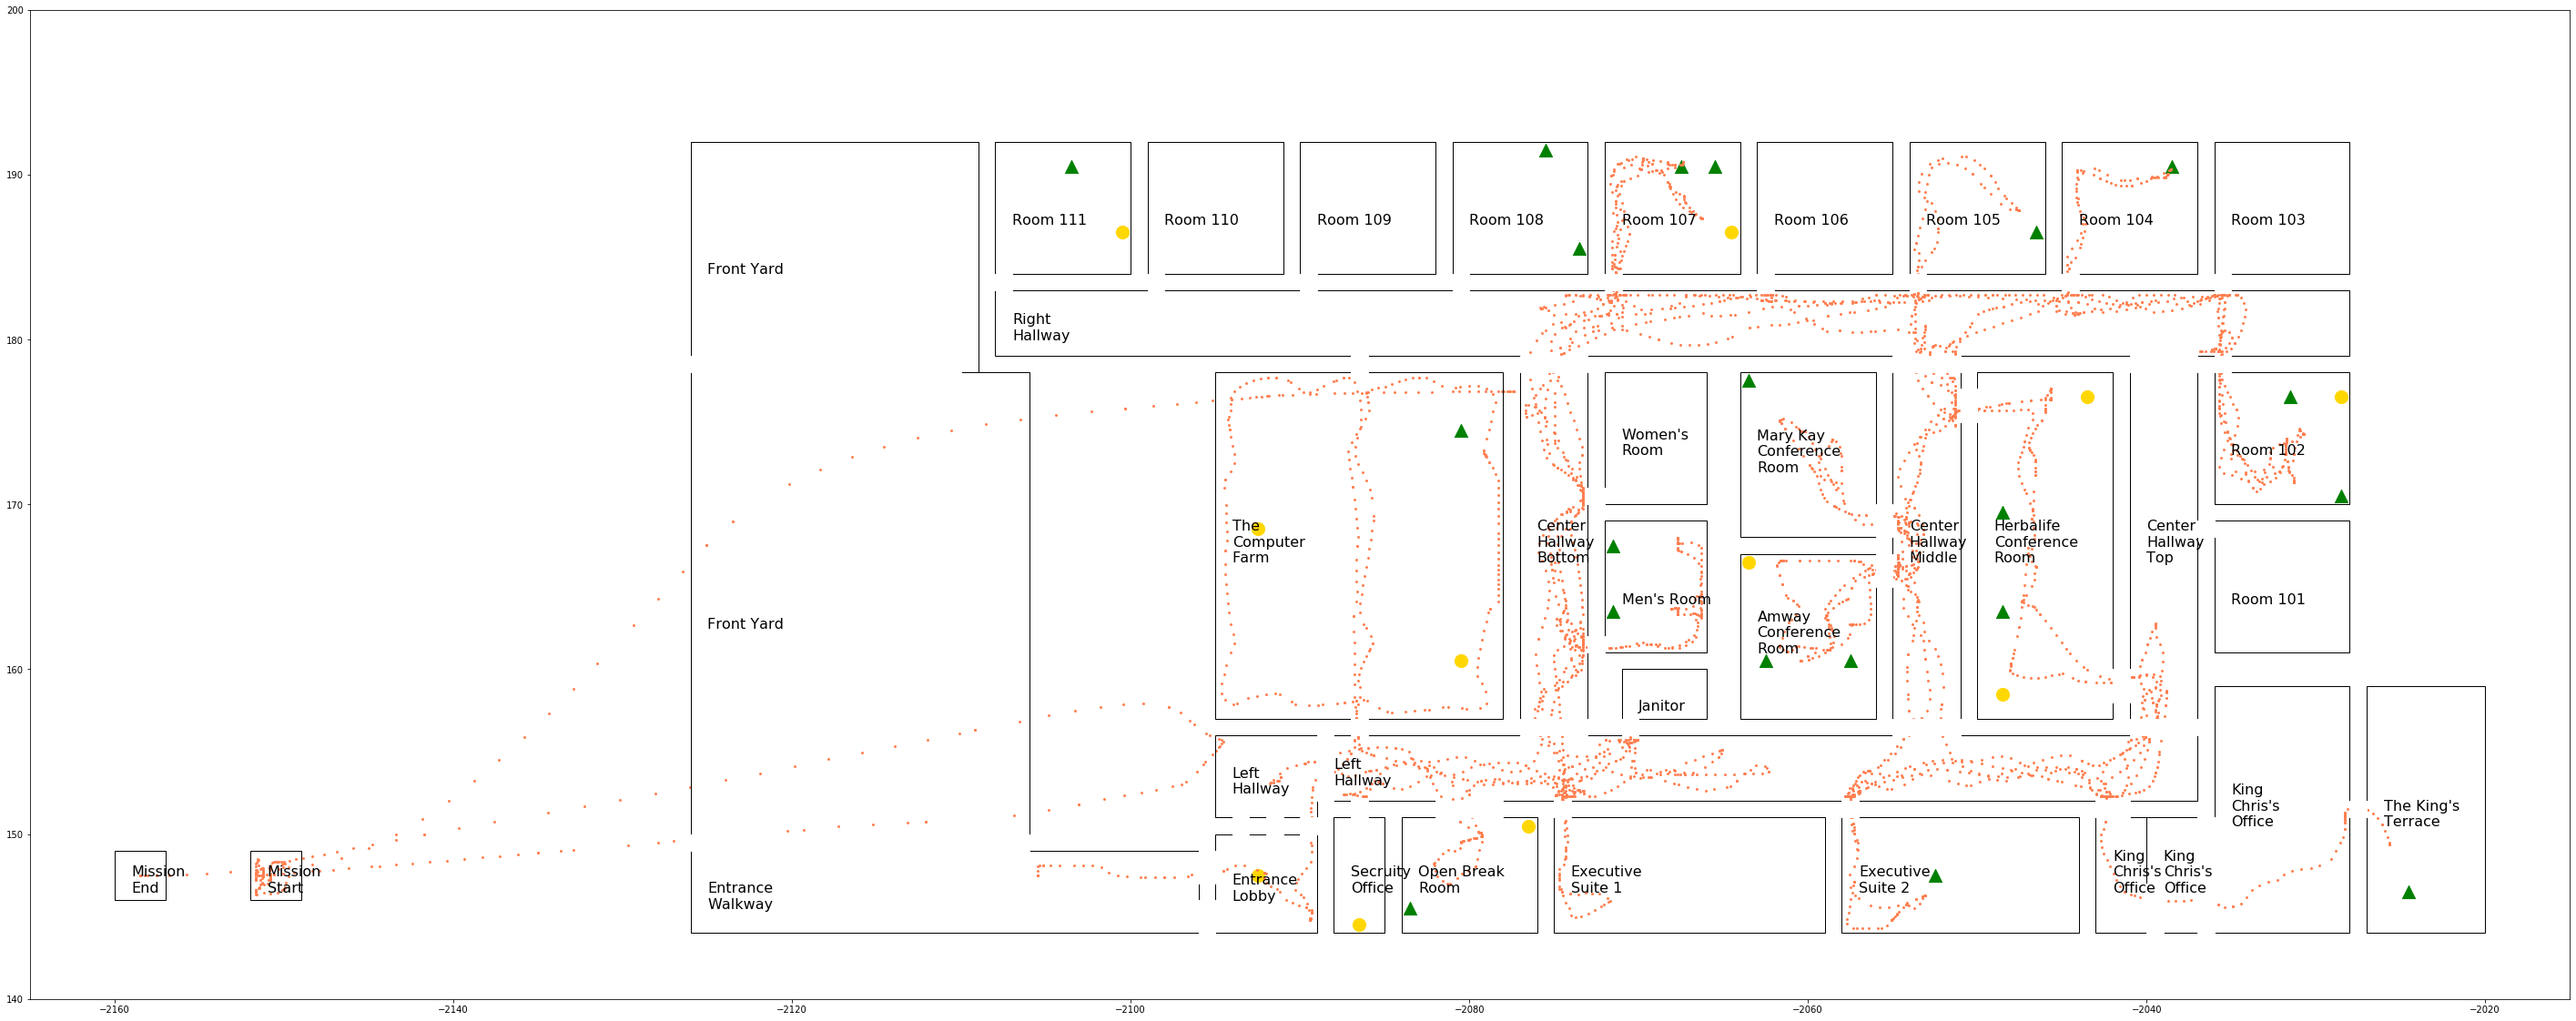

In [191]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import textwrap 

fig,ax = plt.subplots(figsize=(50,20))
currentAxis = plt.gca()

for i in range(len(area_df)):
    currentAxis.add_patch(Rectangle((area_df['x1'][i], area_df['y1'][i]), \
                                    area_df['x2'][i]-area_df['x1'][i], area_df['y2'][i]-area_df['y1'][i], \
                                    fill=False, color='black'))
    plt.text(area_df['x1'][i]+1, (area_df['y1'][i]+area_df['y2'][i])/2-1, textwrap.fill(area_df['name'][i], 10),\
             fontsize=16)

for i in range(len(connection_df)):
    currentAxis.add_patch(Rectangle((connection_df['x'][i], connection_df['y'][i]), \
                                    connection_df['x2'][i]-connection_df['x'][i],\
                                    connection_df['y2'][i]-connection_df['y'][i], \
                                    fill=True, color='white'))
plt.scatter(critical_df['x'], critical_df['y'], s=200, marker='o', c= 'gold')
plt.scatter(non_critical_df['x'], non_critical_df['y'], s=200, marker='^', c= 'green')

plt.scatter(df['data_x'], df['data_z'], s= 15, marker='.', c= 'coral')



plt.xlim([-2165, -2015]) 
plt.ylim([140, 200])
plt.savefig('final.jpeg')

In [228]:
new_loc_df = location_df.groupby(['area_id'])[['victims.critical', 'victims.non_critical']].sum().reset_index()

In [229]:
total_yellow_victim = sum(new_loc_df['victims.critical'])

In [230]:
total_yellow_victim

11.0

In [231]:
new_df['remain_yellow_victim'] = np.where(new_df['data_color'] == 'Yellow', 1, 0)

In [232]:
new_df['remain_yellow_victim'] = total_yellow_victim - new_df['remain_yellow_victim'].cumsum()

In [233]:
new_df['cur_room'] = new_df['data_entered_area_id'].ffill()

In [234]:
new_df

,data_id,data_x,data_y,data_z,data_life,data_name,data_motion_z,data_world_time,data_motion_y,data_timestamp,data_yaw,data_motion_x,data_total_time,data_observation_number,data_pitch,data_entity_type,data_playername,data_equippeditemname,data_item_y,data_item_x,data_item_z,data_sprinting,data_entered_area_id,data_entered_area_name,data_itemname,data_mission,data_mission_state,data_exited_area_name,data_exited_area_id,data_door_z,data_door_y,data_open,data_door_x,data_color,data_triage_state,data_victim_y,data_victim_z,data_victim_x,data_scoreboard_ASU_MC,data_beep_y,data_beep_x,data_beep_z,data_source_entity,data_message,data_lever_x,data_lever_y,data_powered,data_lever_z,time_elapsed,next_room,next_victim_is_yellow,next_victim_x,next_victim_y,next_victim_z,next_victim_triaged_distance,remain_yellow_victim,cur_room
0,NaN,-2109.209395,67.021635,156.307589,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:26:47.210,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh2,Left Hallway (2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.677367,ew,True,-2087.0,60.0,144.0,26.344588,11.0,lh2
1,NaN,-2105.500000,60.000000,147.500000,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:27.954,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,ew,Entrance Walkway,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001700,el,True,-2087.0,60.0,144.0,18.828170,11.0,ew
2,NaN,-2094.539335,60.000000,147.772703,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:30.778,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,el,Entrance Lobby,NaN,NaN,NaN,ew,Entrance Walkway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048767,lh1,True,-2087.0,60.0,144.0,8.430590,11.0,el
3,NaN,-2089.401273,60.000000,144.790391,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:47.301,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellow,SUCCESSFUL,60.0,144.0,-2087.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.324150,lh1,True,-2087.0,60.0,144.0,2.528009,10.0,el
4,NaN,-2089.300000,60.000000,151.026278,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:50.062,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh1,Left Hallway,NaN,NaN,NaN,el,Entrance Lobby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.370167,lh2,True,-2077.0,60.0,150.0,12.342741,10.0,lh1
5,NaN,-2088.898147,60.000000,153.651587,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:50.880,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,lh1,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.383800,br,True,-2077.0,60.0,150.0,12.445882,10.0,lh2
6,NaN,-2080.554556,60.000000,150.725837,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:53.237,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,br,Open Break Room,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.423083,lh2,True,-2077.0,60.0,150.0,3.627907,10.0,br
7,NaN,-2080.480675,60.000000,149.554822,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:33:08.793,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellow,SUCCESSFUL,60.0,150.0,-2077.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.682350,lh2,True,-2077.0,60.0,150.0,3.509028,9.0,br
8,NaN,-2081.203145,60.000000,146.949123,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:33:18.804,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Green,SUCCESSFUL,60.0,145.0,-2084.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849200,lh2,False,-2084.0,60.0,145.0,3.409029,9.0,br
9,NaN,-2079.997941,60.000000,152.395729,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:33:20.747,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,br,Open Break Room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.881583,es1,True,-2044.0,60.0,176.0,43.046642,9.0,lh2


In [235]:
new_df = pd.merge(new_df, new_loc_df, left_on='cur_room', right_on='area_id', how='left')

In [236]:
new_df[['victims.critical', 'victims.non_critical']] = new_df[['victims.critical', 'victims.non_critical']].fillna(value=0)


In [237]:
new_df

,data_id,data_x,data_y,data_z,data_life,data_name,data_motion_z,data_world_time,data_motion_y,data_timestamp,data_yaw,data_motion_x,data_total_time,data_observation_number,data_pitch,data_entity_type,data_playername,data_equippeditemname,data_item_y,data_item_x,data_item_z,data_sprinting,data_entered_area_id,data_entered_area_name,data_itemname,data_mission,data_mission_state,data_exited_area_name,data_exited_area_id,data_door_z,data_door_y,data_open,data_door_x,data_color,data_triage_state,data_victim_y,data_victim_z,data_victim_x,data_scoreboard_ASU_MC,data_beep_y,data_beep_x,data_beep_z,data_source_entity,data_message,data_lever_x,data_lever_y,data_powered,data_lever_z,time_elapsed,next_room,next_victim_is_yellow,next_victim_x,next_victim_y,next_victim_z,next_victim_triaged_distance,remain_yellow_victim,cur_room,area_id,victims.critical,victims.non_critical
0,NaN,-2109.209395,67.021635,156.307589,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:26:47.210,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh2,Left Hallway (2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.677367,ew,True,-2087.0,60.0,144.0,26.344588,11.0,lh2,NaN,0.0,0.0
1,NaN,-2105.500000,60.000000,147.500000,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:27.954,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,ew,Entrance Walkway,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001700,el,True,-2087.0,60.0,144.0,18.828170,11.0,ew,NaN,0.0,0.0
2,NaN,-2094.539335,60.000000,147.772703,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:30.778,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,el,Entrance Lobby,NaN,NaN,NaN,ew,Entrance Walkway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048767,lh1,True,-2087.0,60.0,144.0,8.430590,11.0,el,el,1.0,0.0
3,NaN,-2089.401273,60.000000,144.790391,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:47.301,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellow,SUCCESSFUL,60.0,144.0,-2087.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.324150,lh1,True,-2087.0,60.0,144.0,2.528009,10.0,el,el,1.0,0.0
4,NaN,-2089.300000,60.000000,151.026278,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:50.062,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh1,Left Hallway,NaN,NaN,NaN,el,Entrance Lobby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.370167,lh2,True,-2077.0,60.0,150.0,12.342741,10.0,lh1,NaN,0.0,0.0
5,NaN,-2088.898147,60.000000,153.651587,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:50.880,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,lh1,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.383800,br,True,-2077.0,60.0,150.0,12.445882,10.0,lh2,NaN,0.0,0.0
6,NaN,-2080.554556,60.000000,150.725837,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:53.237,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,br,Open Break Room,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.423083,lh2,True,-2077.0,60.0,150.0,3.627907,10.0,br,br,1.0,1.0
7,NaN,-2080.480675,60.000000,149.554822,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:33:08.793,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellow,SUCCESSFUL,60.0,150.0,-2077.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.682350,lh2,True,-2077.0,60.0,150.0,3.509028,9.0,br,br,1.0,1.0
8,NaN,-2081.203145,60.000000,146.949123,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:33:18.804,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Green,SUCCESSFUL,60.0,145.0,-2084.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849200,lh2,False,-2084.0,60.0,145.0,3.409029,9.0,br,br,1.0,1.0
9,NaN,-2079.997941,60.000000,152.395729,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:33:20.747,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,br,Open Break Room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [238]:
room_yellow_victim_df =  new_loc_df[['area_id']]

In [239]:
room_yellow_victim_df['next_room_has_yellow_victim'] = new_loc_df['victims.critical']==1.0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [240]:
room_yellow_victim_df

,area_id,next_room_has_yellow_victim
0,acr,True
1,br,True
2,cf,False
3,el,True
4,es2,False
5,hcr,False
6,mb,False
7,mkcr,False
8,r102,True
9,r104,False


In [241]:
new_df = pd.merge(new_df, room_yellow_victim_df, left_on='next_room', right_on='area_id', how='left')

In [242]:
new_df['next_room_has_yellow_victim'] = new_df['next_room_has_yellow_victim'].fillna(value=False)

In [243]:
new_df

,data_id,data_x,data_y,data_z,data_life,data_name,data_motion_z,data_world_time,data_motion_y,data_timestamp,data_yaw,data_motion_x,data_total_time,data_observation_number,data_pitch,data_entity_type,data_playername,data_equippeditemname,data_item_y,data_item_x,data_item_z,data_sprinting,data_entered_area_id,data_entered_area_name,data_itemname,data_mission,data_mission_state,data_exited_area_name,data_exited_area_id,data_door_z,data_door_y,data_open,data_door_x,data_color,data_triage_state,data_victim_y,data_victim_z,data_victim_x,data_scoreboard_ASU_MC,data_beep_y,data_beep_x,data_beep_z,data_source_entity,data_message,data_lever_x,data_lever_y,data_powered,data_lever_z,time_elapsed,next_room,next_victim_is_yellow,next_victim_x,next_victim_y,next_victim_z,next_victim_triaged_distance,remain_yellow_victim,cur_room,area_id_x,victims.critical,victims.non_critical,area_id_y,next_room_has_yellow_victim
0,NaN,-2109.209395,67.021635,156.307589,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:26:47.210,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh2,Left Hallway (2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.677367,ew,True,-2087.0,60.0,144.0,26.344588,11.0,lh2,NaN,0.0,0.0,NaN,False
1,NaN,-2105.500000,60.000000,147.500000,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:27.954,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,ew,Entrance Walkway,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001700,el,True,-2087.0,60.0,144.0,18.828170,11.0,ew,NaN,0.0,0.0,el,True
2,NaN,-2094.539335,60.000000,147.772703,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:30.778,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,el,Entrance Lobby,NaN,NaN,NaN,ew,Entrance Walkway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048767,lh1,True,-2087.0,60.0,144.0,8.430590,11.0,el,el,1.0,0.0,NaN,False
3,NaN,-2089.401273,60.000000,144.790391,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:47.301,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellow,SUCCESSFUL,60.0,144.0,-2087.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.324150,lh1,True,-2087.0,60.0,144.0,2.528009,10.0,el,el,1.0,0.0,NaN,False
4,NaN,-2089.300000,60.000000,151.026278,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:50.062,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh1,Left Hallway,NaN,NaN,NaN,el,Entrance Lobby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.370167,lh2,True,-2077.0,60.0,150.0,12.342741,10.0,lh1,NaN,0.0,0.0,NaN,False
5,NaN,-2088.898147,60.000000,153.651587,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:50.880,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,lh1,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.383800,br,True,-2077.0,60.0,150.0,12.445882,10.0,lh2,NaN,0.0,0.0,br,True
6,NaN,-2080.554556,60.000000,150.725837,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:53.237,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,br,Open Break Room,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.423083,lh2,True,-2077.0,60.0,150.0,3.627907,10.0,br,br,1.0,1.0,NaN,False
7,NaN,-2080.480675,60.000000,149.554822,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:33:08.793,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellow,SUCCESSFUL,60.0,150.0,-2077.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.682350,lh2,True,-2077.0,60.0,150.0,3.509028,9.0,br,br,1.0,1.0,NaN,False
8,NaN,-2081.203145,60.000000,146.949123,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:33:18.804,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Green,SUCCESSFUL,60.0,145.0,-2084.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849200,lh2,False,-2084.0,60.0,145.0,3.409029,9.0,br,br,1.0,1.0,NaN,False
9,NaN,-2079.997941,60.000000,152.395729,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:33:20.747,NaN,NaN,Na

In [244]:
condition_df = pd.read_csv('Data/metadata/conditions_metadata.csv')  

In [245]:
condition_df

,study_id,condition_id,condition_between_Ss,condition_within_Ss,notes
0,study_id_000001,condition_id_000001,trained about signal & triage tradeoff,easy mission Sparky lights on,"Sparky is a small map, light switch use is req..."
1,study_id_000001,condition_id_000002,trained about triage tradeoff,easy mission Sparky lights on,"Sparky is a small map, light switch use is req..."
2,study_id_000001,condition_id_000003,untrained,easy mission Sparky lights on,"Sparky is a small map, light switch use is req..."
3,study_id_000001,condition_id_000004,"untrained, dynamic map","easy mission Sparky lights on, dynamic map off...","Sparky is a small map, light switch use is req..."
4,study_id_000001,condition_id_000005,trained about signal & triage tradeoff,hard mission Falcon,"Falcon is a large map, light switch use is req..."
5,study_id_000001,condition_id_000006,trained about triage tradeoff,hard mission Falcon,"Falcon is a large map, light switch use is req..."
6,study_id_000001,condition_id_000007,untrained,hard mission Falcon,"Falcon is a large map, light switch use is req..."
7,study_id_000001,condition_id_000008,"untrained, dynamic map","hard mission Falcon, dynamic map off in first ...","Falcon is a large map, light switch use is req..."


In [246]:
mission_complex_df = condition_df[['condition_id', 'condition_within_Ss']]

In [247]:
mission_complex_df

,condition_id,condition_within_Ss
0,condition_id_000001,easy mission Sparky lights on
1,condition_id_000002,easy mission Sparky lights on
2,condition_id_000003,easy mission Sparky lights on
3,condition_id_000004,"easy mission Sparky lights on, dynamic map off..."
4,condition_id_000005,hard mission Falcon
5,condition_id_000006,hard mission Falcon
6,condition_id_000007,hard mission Falcon
7,condition_id_000008,"hard mission Falcon, dynamic map off in first ..."


In [248]:
study_id = fname[11:26]

'study_id_000001'

In [249]:
condition_id = fname[27:46]

In [250]:
trial_id = fname[47:62]

In [ ]:
new_df['study_id'] = study_id

In [251]:
new_df['condition_id'] = condition_id

In [252]:
new_df['trial_id'] = trial_id

In [253]:
new_df['subject_id'] = subject_id

In [254]:
new_df = pd.merge(new_df, mission_complex_df, left_on='condition_id', right_on='condition_id', how='left')

In [255]:
new_df

,data_id,data_x,data_y,data_z,data_life,data_name,data_motion_z,data_world_time,data_motion_y,data_timestamp,data_yaw,data_motion_x,data_total_time,data_observation_number,data_pitch,data_entity_type,data_playername,data_equippeditemname,data_item_y,data_item_x,data_item_z,data_sprinting,data_entered_area_id,data_entered_area_name,data_itemname,data_mission,data_mission_state,data_exited_area_name,data_exited_area_id,data_door_z,data_door_y,data_open,data_door_x,data_color,data_triage_state,data_victim_y,data_victim_z,data_victim_x,data_scoreboard_ASU_MC,data_beep_y,data_beep_x,data_beep_z,data_source_entity,data_message,data_lever_x,data_lever_y,data_powered,data_lever_z,time_elapsed,next_room,next_victim_is_yellow,next_victim_x,next_victim_y,next_victim_z,next_victim_triaged_distance,remain_yellow_victim,cur_room,area_id_x,victims.critical,victims.non_critical,area_id_y,next_room_has_yellow_victim,condition_id,trial_id,subject_id,condition_within_Ss
0,NaN,-2109.209395,67.021635,156.307589,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:26:47.210,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh2,Left Hallway (2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.677367,ew,True,-2087.0,60.0,144.0,26.344588,11.0,lh2,NaN,0.0,0.0,NaN,False,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon
1,NaN,-2105.500000,60.000000,147.500000,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:27.954,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,ew,Entrance Walkway,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001700,el,True,-2087.0,60.0,144.0,18.828170,11.0,ew,NaN,0.0,0.0,el,True,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon
2,NaN,-2094.539335,60.000000,147.772703,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:30.778,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,el,Entrance Lobby,NaN,NaN,NaN,ew,Entrance Walkway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048767,lh1,True,-2087.0,60.0,144.0,8.430590,11.0,el,el,1.0,0.0,NaN,False,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon
3,NaN,-2089.401273,60.000000,144.790391,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:47.301,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellow,SUCCESSFUL,60.0,144.0,-2087.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.324150,lh1,True,-2087.0,60.0,144.0,2.528009,10.0,el,el,1.0,0.0,NaN,False,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon
4,NaN,-2089.300000,60.000000,151.026278,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:50.062,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh1,Left Hallway,NaN,NaN,NaN,el,Entrance Lobby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.370167,lh2,True,-2077.0,60.0,150.0,12.342741,10.0,lh1,NaN,0.0,0.0,NaN,False,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon
5,NaN,-2088.898147,60.000000,153.651587,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:50.880,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,lh1,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.383800,br,True,-2077.0,60.0,150.0,12.445882,10.0,lh2,NaN,0.0,0.0,br,True,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon
6,NaN,-2080.554556,60.000000,150.725837,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:53.237,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,br,Open Break Room,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.423083,lh2,True,-2077.0,60.0,150.0,3.627907,10.0,br,br,1.0,1.0,NaN,False,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon
7,NaN,-2080.480675,60.000000,149.554822,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:33:08.793,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yell

In [256]:
training_df = condition_df[['condition_id', 'condition_between_Ss']]

In [257]:
new_df = pd.merge(new_df, training_df, left_on='condition_id', right_on='condition_id', how='left')

In [18]:
survey_df = pd.read_excel('Data/surveys/ASIST_data_study_id_000001_surveys_fulltext.xlsx')  

In [19]:
survey_df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q81_11_TEXT,Q82,Q83,Q84,Q85,Q86,Q87,Q88,SC0,SC1
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,"Of all the computer games you have played, ple...","Of all the games you have played, which specif...",What First-Person Action or Real-time Strategy...,Think for a moment about the people with whom ...,Referring to those people who are very good or...,Have you ever participated in tournaments or c...,"If you have participated, please list the tour...","In those competitions, how many have you ever ...",Pre-knowledge Score,Post-knowledge Score
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID91_14_TEXT""}","{""ImportId"":""QID92_TEXT""}","{""ImportId"":""QID93_TEXT""}","{""ImportId"":""QID141""}","{""ImportId"":""QID142""}","{""ImportId"":""QID143""}","{""ImportId"":""QID144_TEXT""}","{""ImportId"":""QID145_TEXT""}","{""ImportId"":""SC_0dFvjllRXQzBoYR""}","{""ImportId"":""SC_7QX4UMJTXCzvJad""}"
2,2020-05-15 15:14:54,2020-05-15 16:45:52,IP Address,72.201.232.156,100,5458,True,2020-05-15 16:45:53,R_1M3vJ20kHpVQLXO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,20
3,2020-05-19 15:39:39,2020-05-19 17:01:49,IP Address,149.169.53.208,100,4930,True,2020-05-19 17:01:50,R_31ML5SrHMX1Bhfj,NaN,...,-99,Build,"Minecraft, league of legends",NaN,NaN,NaN,NaN,NaN,50,20
4,2020-05-22 14:36:47,2020-05-22 15:56:25,IP Address,24.56.44.97,100,4778,True,2020-05-22 15:56:26,R_1eRxdOU3y9UB0gH,NaN,...,-99,Sports and 1st person shooter,Sports but barely play games anymore,NaN,NaN,NaN,NaN,NaN,50,10
5,2020-06-03 14:08:45,2020-06-03 15:27:45,IP Address,18.21.240.119,100,4739,True,2020-06-03 15:27:45,R_3g6CTtRb8NszJAh,NaN,...,-99,first person shooter,Minecraft,NaN,NaN,NaN,NaN,NaN,80,20
6,2020-06-10 14:41:00,2020-06-10 16:08:48,IP Address,50.47.106.42,100,5267,True,2020-06-10 16:08:48,R_3hEXU10BeEx6xc0,NaN,...,-99,Puzzle,Minecraft,Some of them are very good,Some of them would say that I am better,No,NaN,NaN,80,20
7,2020-06-12 11:24:33,2020-06-12 15:14:05,IP Address,71.223.21.225,100,13772,True,2020-06-12 15:14:06,R_3dSsAiJJ3SlpYeO,NaN,...,-99,backgammon,Rise of nations,Some of them are good,Some of them would say that I am better,Yes,backgammon tournament in Turkey,10,100,20
8,2020-06-16 15:02:30,2020-06-16 16:14:45,IP Address,96.78.57.214,100,4335,True,2020-06-16 16:14:46,R_e8V99hISa2O0kUN,NaN,...,-99,"first person shooter, puzzle","Minecraft, COD: Warzone",Some of them are very good,Some of them would say that I am better,No,NaN,NaN,60,10
9,2020-06-17 10:33:19,2020-06-17 12:19:33,IP Address,69.122.234.64,100,6374,True,2020-06-17 12:19:34,R_2znyQtgWIp8XuO6,NaN,...,-99,Call of duty: Modern Warfare/Warzone (popular ...,Call of Duty: Modern Warfare/Warzone (first pe...,Some of them are very good,Some of them would say that I am better,No,NaN,NaN,70,20


In [20]:
survey_df = survey_df.drop([0, 1]).reset_index(drop=True)

In [21]:
survey_df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q81_11_TEXT,Q82,Q83,Q84,Q85,Q86,Q87,Q88,SC0,SC1
0,2020-05-15 15:14:54,2020-05-15 16:45:52,IP Address,72.201.232.156,100,5458,True,2020-05-15 16:45:53,R_1M3vJ20kHpVQLXO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,20
1,2020-05-19 15:39:39,2020-05-19 17:01:49,IP Address,149.169.53.208,100,4930,True,2020-05-19 17:01:50,R_31ML5SrHMX1Bhfj,NaN,...,-99,Build,"Minecraft, league of legends",NaN,NaN,NaN,NaN,NaN,50,20
2,2020-05-22 14:36:47,2020-05-22 15:56:25,IP Address,24.56.44.97,100,4778,True,2020-05-22 15:56:26,R_1eRxdOU3y9UB0gH,NaN,...,-99,Sports and 1st person shooter,Sports but barely play games anymore,NaN,NaN,NaN,NaN,NaN,50,10
3,2020-06-03 14:08:45,2020-06-03 15:27:45,IP Address,18.21.240.119,100,4739,True,2020-06-03 15:27:45,R_3g6CTtRb8NszJAh,NaN,...,-99,first person shooter,Minecraft,NaN,NaN,NaN,NaN,NaN,80,20
4,2020-06-10 14:41:00,2020-06-10 16:08:48,IP Address,50.47.106.42,100,5267,True,2020-06-10 16:08:48,R_3hEXU10BeEx6xc0,NaN,...,-99,Puzzle,Minecraft,Some of them are very good,Some of them would say that I am better,No,NaN,NaN,80,20
5,2020-06-12 11:24:33,2020-06-12 15:14:05,IP Address,71.223.21.225,100,13772,True,2020-06-12 15:14:06,R_3dSsAiJJ3SlpYeO,NaN,...,-99,backgammon,Rise of nations,Some of them are good,Some of them would say that I am better,Yes,backgammon tournament in Turkey,10,100,20
6,2020-06-16 15:02:30,2020-06-16 16:14:45,IP Address,96.78.57.214,100,4335,True,2020-06-16 16:14:46,R_e8V99hISa2O0kUN,NaN,...,-99,"first person shooter, puzzle","Minecraft, COD: Warzone",Some of them are very good,Some of them would say that I am better,No,NaN,NaN,60,10
7,2020-06-17 10:33:19,2020-06-17 12:19:33,IP Address,69.122.234.64,100,6374,True,2020-06-17 12:19:34,R_2znyQtgWIp8XuO6,NaN,...,-99,Call of duty: Modern Warfare/Warzone (popular ...,Call of Duty: Modern Warfare/Warzone (first pe...,Some of them are very good,Some of them would say that I am better,No,NaN,NaN,70,20
8,2020-06-18 09:35:27,2020-06-18 10:49:39,IP Address,98.229.212.24,100,4451,True,2020-06-18 10:49:39,R_3I3MIJs9WBjbPPD,NaN,...,-99,Turn bases stratagy,Minecraft,Some of them are very good,Some of them would say that I am better,No,NaN,NaN,110,30
9,2020-06-18 15:33:11,2020-06-18 17:22:57,IP Address,162.250.92.99,100,6586,True,2020-06-18 17:22:58,R_25L83n27aQPyHjY,NaN,...,-99,First person shooter,Counter-Strike: Global Offensive,Some of them are very good,Some of them would say that I am better,No,NaN,NaN,90,20


In [26]:
survey_cols = ['Q2', 'Q5_1','Q5_2','Q5_3','Q5_4','Q5_5','Q5_6','Q5_7','Q5_8','Q5_9','Q5_10']
survey_df=survey_df[survey_cols]    
for col in survey_cols[1:]:        
    survey_df[col] = survey_df[col].apply(lambda x: x[:-4] if type(x)==str else str(x))  

In [27]:
mapping = {'Strongly disagree': 1, 'Disagree': 2, 'Somewhat disagree': 3, 'Somewhat agree': 4, 'Agree': 5, 'Strongly agree': 6, '-99': 0}


In [28]:
survey_df = survey_df.replace({'Q5_1': mapping, 'Q5_2': mapping, 'Q5_3': mapping, 'Q5_4': mapping, 'Q5_5': mapping, 'Q5_6': mapping, 'Q5_7': mapping, 'Q5_8': mapping, 'Q5_9': mapping, 'Q5_10': mapping})



In [29]:
survey_df

,Q2,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q5_9,Q5_10
0,subject_id_000005,2,1,2,2,2,2,1,3,0,2
1,subject_id_000006,5,6,6,5,5,6,6,6,6,6
2,subject_id_000007,6,6,5,5,6,5,5,6,5,5
3,subject_id_000008,6,6,6,6,6,6,6,6,6,6
4,subject_id_000009,5,5,5,4,4,5,6,6,4,5
5,subject_id_000010,6,5,4,3,4,3,5,5,5,5
6,subject_id_000011,4,5,4,5,5,4,0,6,5,5
7,subject_id_000012,6,6,5,4,5,4,6,5,4,5
8,subject_id_000013,5,3,6,6,4,6,6,6,6,6
9,subject_id_000014,4,5,4,4,4,6,6,2,3,6


In [15]:
survey_df['sat_tendency'] = survey_df[survey_df[['Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5', 'Q5_6', 'Q5_7', 'Q5_8', 'Q5_9', 'Q5_10']] >0].mean(1)


TypeError: '>' not supported between instances of 'str' and 'int'

In [265]:
survey_df.loc[:,'sat_tendency'] = survey_df.sum(axis=1) 

In [266]:
survey_df

,Q2,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q5_9,Q5_10,sat_tendency
0,subject_id_000005,2,1,2,2,2,2,1,3,0,2,17
1,subject_id_000006,5,6,6,5,5,6,6,6,6,6,57
2,subject_id_000007,6,6,5,5,6,5,5,6,5,5,54
3,subject_id_000008,6,6,6,6,6,6,6,6,6,6,60
4,subject_id_000009,5,5,5,4,4,5,6,6,4,5,49
5,subject_id_000010,6,5,4,3,4,3,5,5,5,5,45
6,subject_id_000011,4,5,4,5,5,4,0,6,5,5,43
7,subject_id_000012,6,6,5,4,5,4,6,5,4,5,50
8,subject_id_000013,5,3,6,6,4,6,6,6,6,6,54
9,subject_id_000014,4,5,4,4,4,6,6,2,3,6,44


In [267]:
satisfy_df = survey_df[['Q2', 'sat_tendency']]

In [268]:
satisfy_df

,Q2,sat_tendency
0,subject_id_000005,17
1,subject_id_000006,57
2,subject_id_000007,54
3,subject_id_000008,60
4,subject_id_000009,49
5,subject_id_000010,45
6,subject_id_000011,43
7,subject_id_000012,50
8,subject_id_000013,54
9,subject_id_000014,44


In [269]:
new_df = pd.merge(new_df, satisfy_df, left_on='subject_id', right_on='Q2', how='left')

In [270]:
new_df

,data_id,data_x,data_y,data_z,data_life,data_name,data_motion_z,data_world_time,data_motion_y,data_timestamp,data_yaw,data_motion_x,data_total_time,data_observation_number,data_pitch,data_entity_type,data_playername,data_equippeditemname,data_item_y,data_item_x,data_item_z,data_sprinting,data_entered_area_id,data_entered_area_name,data_itemname,data_mission,data_mission_state,data_exited_area_name,data_exited_area_id,data_door_z,data_door_y,data_open,data_door_x,data_color,data_triage_state,data_victim_y,data_victim_z,data_victim_x,data_scoreboard_ASU_MC,data_beep_y,data_beep_x,data_beep_z,data_source_entity,data_message,data_lever_x,data_lever_y,data_powered,data_lever_z,time_elapsed,next_room,next_victim_is_yellow,next_victim_x,next_victim_y,next_victim_z,next_victim_triaged_distance,remain_yellow_victim,cur_room,area_id_x,victims.critical,victims.non_critical,area_id_y,next_room_has_yellow_victim,condition_id,trial_id,subject_id,condition_within_Ss,condition_between_Ss,Q2,sat_tendency
0,NaN,-2109.209395,67.021635,156.307589,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:26:47.210,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh2,Left Hallway (2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.677367,ew,True,-2087.0,60.0,144.0,26.344588,11.0,lh2,NaN,0.0,0.0,NaN,False,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon,trained about signal & triage tradeoff,subject_id_000013,54
1,NaN,-2105.500000,60.000000,147.500000,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:27.954,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,ew,Entrance Walkway,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001700,el,True,-2087.0,60.0,144.0,18.828170,11.0,ew,NaN,0.0,0.0,el,True,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon,trained about signal & triage tradeoff,subject_id_000013,54
2,NaN,-2094.539335,60.000000,147.772703,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:30.778,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,el,Entrance Lobby,NaN,NaN,NaN,ew,Entrance Walkway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048767,lh1,True,-2087.0,60.0,144.0,8.430590,11.0,el,el,1.0,0.0,NaN,False,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon,trained about signal & triage tradeoff,subject_id_000013,54
3,NaN,-2089.401273,60.000000,144.790391,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:47.301,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellow,SUCCESSFUL,60.0,144.0,-2087.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.324150,lh1,True,-2087.0,60.0,144.0,2.528009,10.0,el,el,1.0,0.0,NaN,False,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon,trained about signal & triage tradeoff,subject_id_000013,54
4,NaN,-2089.300000,60.000000,151.026278,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:50.062,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh1,Left Hallway,NaN,NaN,NaN,el,Entrance Lobby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.370167,lh2,True,-2077.0,60.0,150.0,12.342741,10.0,lh1,NaN,0.0,0.0,NaN,False,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon,trained about signal & triage tradeoff,subject_id_000013,54
5,NaN,-2088.898147,60.000000,153.651587,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:50.880,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN,lh1,Left Hallway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.383800,br,True,-2077.0,60.0,150.0,12.445882,10.0,lh2,NaN,0.0,0.0,br,True,condition_id_000005,trial_id_000009,subject_id_000013,hard mission Falcon,trained about signal & triage tradeoff,subject_id_000013,54
6,NaN,-2080.554556,60.000000,150.725837,NaN,NaN,NaN,NaN,NaN,2020-06-18 16:32:53.237,NaN,NaN,NaN,NaN,NaN,NaN,ASU_MC,NaN,NaN,NaN,NaN,NaN,br,Open Break Room,NaN,NaN,NaN,lh2,Left Hallway,NaN,NaN,NaN

In [276]:
final_df = new_df[['next_victim_is_yellow', 'condition_within_Ss', \
                  'next_victim_triaged_distance', 'sat_tendency', 'remain_yellow_victim',\
                  'time_elapsed', 'victims.critical', 'victims.non_critical', \
                  'next_room_has_yellow_victim', 'condition_between_Ss', 'trial_id']]





In [277]:
final_df

,next_victim_is_yellow,condition_within_Ss,next_victim_triaged_distance,sat_tendency,remain_yellow_victim,time_elapsed,victims.critical,victims.non_critical,next_room_has_yellow_victim,condition_between_Ss,trial_id
0,True,hard mission Falcon,26.344588,54,11.0,-5.677367,0.0,0.0,False,trained about signal & triage tradeoff,trial_id_000009
1,True,hard mission Falcon,18.828170,54,11.0,0.001700,0.0,0.0,True,trained about signal & triage tradeoff,trial_id_000009
2,True,hard mission Falcon,8.430590,54,11.0,0.048767,1.0,0.0,False,trained about signal & triage tradeoff,trial_id_000009
3,True,hard mission Falcon,2.528009,54,10.0,0.324150,1.0,0.0,False,trained about signal & triage tradeoff,trial_id_000009
4,True,hard mission Falcon,12.342741,54,10.0,0.370167,0.0,0.0,False,trained about signal & triage tradeoff,trial_id_000009
5,True,hard mission Falcon,12.445882,54,10.0,0.383800,0.0,0.0,True,trained about signal & triage tradeoff,trial_id_000009
6,True,hard mission Falcon,3.627907,54,10.0,0.423083,1.0,1.0,False,trained about signal & triage tradeoff,trial_id_000009
7,True,hard mission Falcon,3.509028,54,9.0,0.682350,1.0,1.0,False,trained about signal & triage tradeoff,trial_id_000009
8,False,hard mission Falcon,3.409029,54,9.0,0.849200,1.0,1.0,False,trained about signal & triage tradeoff,trial_id_000009
9,True,hard mission Falcon,43.046642,54,9.0,0.881583,0.0,0.0,False,trained about signal & triage tradeoff,trial_id_000009


In [278]:
final_df.to_csv('phase1_final.csv')